## Image Inpainting

Let's get an image and try to teach a neural network to paint. Online demonstration of "Image Inpainting" is from professor Andrej Karpathy.

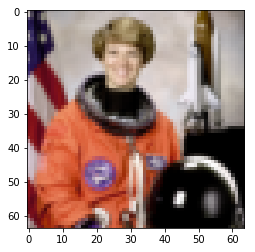

In [1]:
%matplotlib inline
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from skimage.data import astronaut
from scipy.misc import imresize
img = imresize(astronaut(),(64,64))
plt.imshow(img)


In [2]:
#Positions of the image in a list
xs = []

#Corresponding colors of an image
ys = []


for row_i in range(img.shape[0]):
    for col_i in range(img.shape[1]):
        xs.append([row_i, col_i])
        ys.append(img[row_i, col_i])
        
#Convert List into arrays
xs = np.array(xs)
ys = np.array(ys)

#Normalize a input by mean and standard deviation

xs = (xs - np.mean(xs))/ np.std(xs)

xs.shape, ys.shape




((4096, 2), (4096, 3))

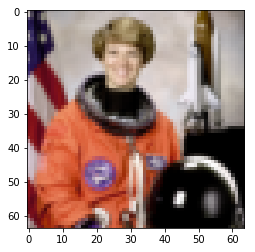

In [3]:
plt.imshow(ys.reshape(img.shape))

In [4]:
X = tf.placeholder(tf.float32, shape = [None,2], name = 'X')
Y = tf.placeholder(tf.float32, shape = [None,3], name = 'Y')

## Building the network

In [8]:
def linear(X, n_input, n_output, activation=None, scope=None):
    with tf.variable_scope(scope or "linear"):
        W = tf.get_variable(
            name='W',
            shape=[n_input, n_output],
            initializer=tf.random_normal_initializer(mean=0.0, stddev=0.1))
        b = tf.get_variable(
            name='b',
            shape=[n_output],
            initializer=tf.constant_initializer())
        h = tf.matmul(X, W) + b
        if activation is not None:
            h = activation(h)
        return h

In [9]:
g = tf.get_default_graph()

n_neurons = [2,64,64,64,64,64,64,3]

current_input = X

for layer_i in range(1, len(n_neurons)):
    current_input = linear(
        X= current_input,
        n_input = n_neurons[layer_i -1],
        n_output = n_neurons[layer_i],
        activation = tf.nn.relu if (layer_i+1) < len(n_neurons) else None,
        scope = 'layer_' + str(layer_i))
Y_pred = current_input

In [11]:
def distance(p1,p2):
    return tf.abs(p1-p2)

In [12]:
cost = tf.reduce_mean(
    tf.reduce_sum(distance(Y_pred, Y), 1))

In [13]:
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

0 173.668
1 163.025
2 158.231
3 154.306
4 151.272
5 146.38
6 144.693
7 142.707
8 138.913
9 136.371
10 133.514
11 131.383
12 129.237
13 128.304
14 129.488
15 126.964
16 125.014
17 124.001
18 122.557
19 121.819


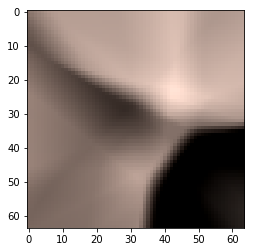

20 118.738
21 111.975
22 107.444
23 105.856
24 108.033
25 104.68
26 103.327
27 99.6464
28 102.254
29 99.8062
30 98.4375
31 96.9014
32 93.1374
33 93.5423
34 95.0602
35 91.5875
36 92.3365
37 88.8867
38 92.7278
39 90.0174


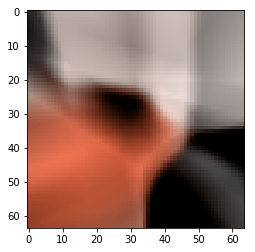

40 88.2263
41 88.2666
42 94.8417
43 84.6817
44 84.6113
45 89.9623
46 89.8779
47 83.9671
48 82.8739
49 88.4536
50 81.1796
51 84.7453
52 82.2799
53 81.6741
54 79.9241
55 82.8655
56 79.2216
57 78.5808
58 77.8167
59 81.2531


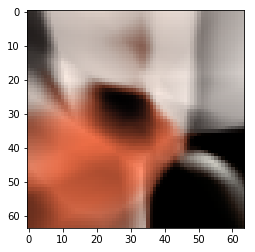

60 78.2551
61 77.0067
62 78.9878
63 77.6467
64 78.7629
65 77.4482
66 80.9893
67 72.4297
68 73.7624
69 73.6701
70 77.2169
71 74.4854
72 71.5034
73 70.9369
74 74.3646
75 70.4134
76 71.1575
77 71.8756
78 73.7527
79 68.7223


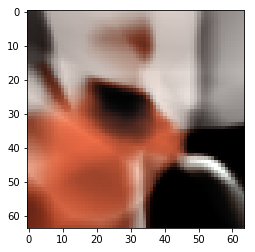

80 70.6082
81 67.5703
82 68.295
83 67.3592
84 71.4303
85 68.6657
86 66.9863
87 69.2103
88 68.3603
89 68.0798
90 67.3965
91 67.3755
92 68.3348
93 70.1732
94 69.3315
95 65.9407
96 68.2856
97 70.0582
98 62.4478
99 67.0376


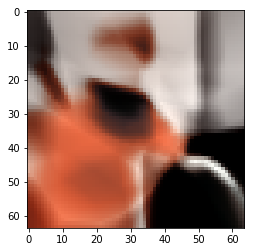

100 69.3947
101 76.6273
102 63.9995
103 64.5255
104 63.703
105 70.3711
106 63.461
107 68.6252
108 64.8725
109 60.6073
110 60.4299
111 62.7519
112 62.8473
113 62.9555
114 61.9585
115 62.8142
116 64.9886
117 62.1645
118 68.1973
119 63.9665


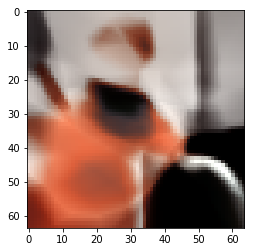

120 60.7128
121 63.0778
122 62.5349
123 62.3333
124 66.4846
125 62.9204
126 58.5538
127 64.2508
128 61.02
129 59.5373
130 64.7337
131 61.7568
132 63.3282
133 62.1439
134 60.7369
135 59.8848
136 61.9576
137 61.4457
138 59.4688
139 58.2881


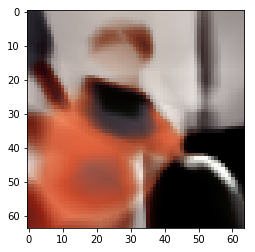

140 60.9334
141 60.1136
142 60.6875
143 59.8876
144 57.8113
145 59.8344
146 57.7629
147 57.6034
148 58.3614
149 60.3297
150 59.1651
151 59.3696
152 55.312
153 57.3211
154 61.9207
155 58.683
156 60.2675
157 56.9024
158 57.1672
159 58.1548


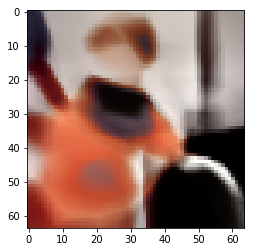

160 59.8971
161 58.947
162 56.3305
163 57.0336
164 57.2975
165 59.5535
166 57.0836
167 55.841
168 55.5626
169 58.3018
170 53.8608
171 57.1602
172 54.2992
173 55.5862
174 55.7989
175 57.0467
176 53.3299
177 57.8184
178 58.7184
179 58.2799


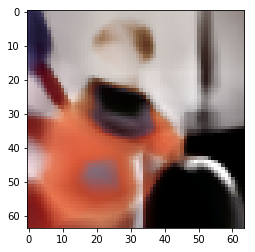

180 52.2082
181 53.6847
182 53.4065
183 53.9283
184 57.7432
185 54.9884
186 54.8242
187 52.3856
188 52.9304
189 54.0619
190 51.1772
191 53.4791
192 52.9185
193 52.7136
194 53.8186
195 53.4291
196 51.8958
197 51.5296
198 52.9539
199 51.2527


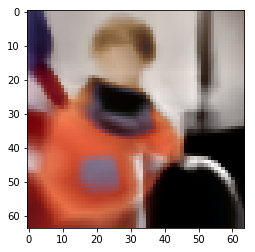

200 56.215
201 53.5901
202 54.8923
203 51.0061
204 51.745
205 58.349
206 51.6597
207 50.5989
208 53.5187
209 50.1821
210 56.1262
211 51.6215
212 50.6953
213 52.0859
214 50.1428
215 54.4062
216 51.8395
217 59.676
218 49.709
219 52.4239


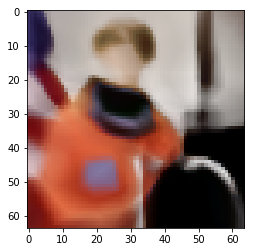

220 50.1459
221 49.3124
222 49.6907
223 49.7563
224 55.3471
225 50.2244
226 50.2636
227 46.8944
228 50.2045
229 46.9151
230 47.8763
231 47.5708
232 54.6557
233 47.4087
234 52.5592
235 46.751
236 48.1597
237 50.0296
238 50.2932
239 51.3091


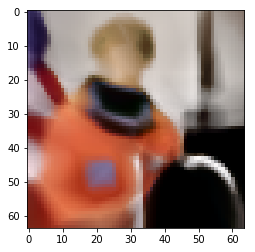

240 48.2375
241 46.9312
242 48.3869
243 47.6661
244 48.3177
245 52.7541
246 46.9011
247 48.1457
248 49.4311
249 52.9569
250 46.8608
251 48.4136
252 47.5292
253 48.7762
254 49.1158
255 49.339
256 48.6233
257 51.8093
258 49.5988
259 49.6122


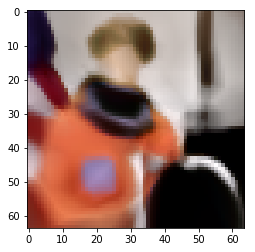

260 49.1333
261 46.2971
262 48.2488
263 48.7385
264 46.5221
265 46.14
266 50.1104
267 47.3513
268 45.4201
269 46.5769
270 46.5548
271 44.6552
272 48.8322
273 47.1446
274 52.5378
275 49.7787
276 45.7318
277 48.6452
278 47.462
279 50.1558


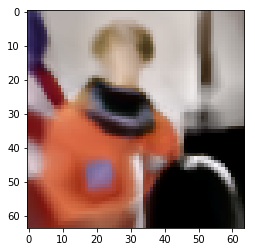

280 45.8708
281 43.5353
282 45.3589
283 45.1864
284 46.8857
285 46.9678
286 47.317
287 44.6356
288 45.9723
289 46.7911
290 48.4085
291 46.364
292 51.9485
293 46.2742
294 55.6158
295 46.0355
296 46.3106
297 44.9698
298 45.4984
299 46.0182


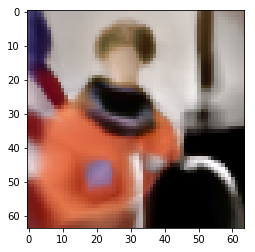

300 47.0179
301 43.0989
302 48.0679
303 47.2339
304 45.7676
305 46.5115
306 45.75
307 42.5313
308 46.9385
309 46.9527
310 42.1591
311 47.8776
312 45.0342
313 41.8401
314 44.9222
315 44.4377
316 48.9155
317 42.4091
318 44.4392
319 45.0611


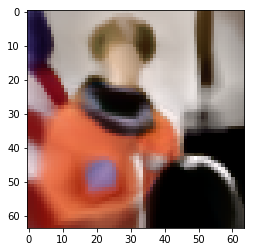

320 45.8774
321 45.9576
322 43.1766
323 42.8774
324 45.0907
325 44.3669
326 45.7782
327 44.4331
328 45.5525
329 45.9894
330 42.3632
331 44.2506
332 48.9904
333 43.4265
334 44.3866
335 47.7178
336 42.3958
337 41.5731
338 44.4169
339 43.9338


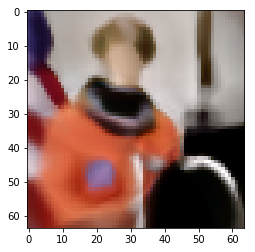

340 43.7018
341 43.5103
342 41.6486
343 42.3959
344 43.0992
345 41.3416
346 42.1616
347 43.2649
348 44.7816
349 41.9606
350 45.1129
351 42.9235
352 40.8003
353 41.1731
354 44.3236
355 44.2191
356 41.8728
357 41.9854
358 41.0052
359 40.9162


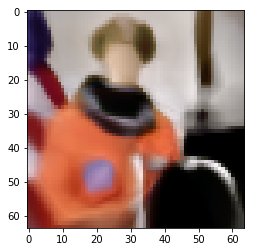

360 45.7113
361 44.497
362 40.7564
363 42.3047
364 43.7162
365 44.6797
366 45.4848
367 42.8554
368 46.6154
369 44.4447
370 42.7885
371 45.8233
372 43.5725
373 39.7797
374 44.1143
375 41.8416
376 41.6367
377 43.5226
378 41.634
379 42.6104


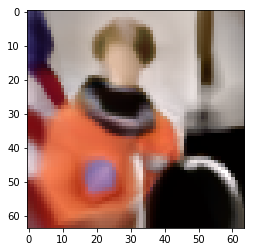

380 45.1834
381 42.0414
382 41.1677
383 42.3569
384 39.6588
385 43.323
386 41.6129
387 46.6613
388 44.0593
389 41.3552
390 43.0595
391 42.1869
392 40.1981
393 42.3915
394 40.9546
395 41.7615
396 41.9249
397 43.0503
398 44.0624
399 43.7103


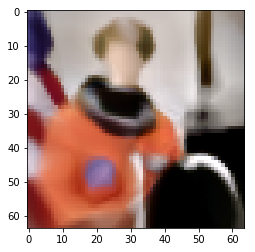

400 43.5923
401 39.1663
402 39.722
403 45.613
404 43.2379
405 43.6709
406 41.6477
407 42.1699
408 40.0375
409 39.2533
410 44.0977
411 42.4251
412 38.9496
413 41.3399
414 46.1019
415 39.7965
416 38.5872
417 40.7062
418 40.3465
419 39.4172


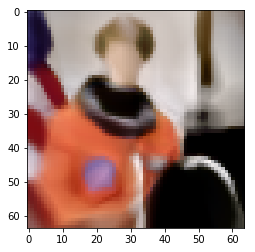

420 42.7577
421 40.6121
422 40.5648
423 39.5177
424 39.4017
425 37.2107
426 42.542
427 43.5318
428 41.5346
429 38.9061
430 40.5581
431 41.9137
432 44.4034
433 38.378
434 41.2023
435 44.7831
436 41.0919
437 39.6017
438 40.8216
439 43.2665


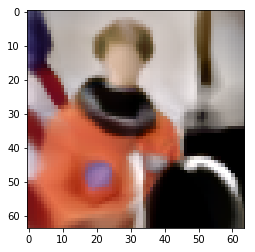

440 42.1165
441 40.9269
442 40.5827
443 42.7264
444 39.3369
445 40.8278
446 39.1493
447 39.891
448 40.4808
449 39.9325
450 38.4803
451 42.822
452 37.7077
453 38.4965
454 38.8806
455 39.9811
456 42.1061
457 40.5783
458 40.2032
459 38.756


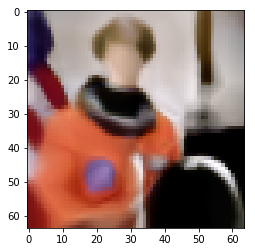

460 42.6008
461 40.1487
462 39.5251
463 40.469
464 38.1295
465 39.5758
466 40.8973
467 37.6376
468 39.5193
469 38.7277
470 39.5845
471 38.5308
472 38.81
473 40.4807
474 40.3115
475 36.6503
476 38.8572
477 43.9151
478 39.9893
479 39.5425


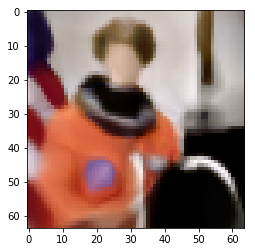

480 36.5272
481 42.0216
482 40.1174
483 38.3984
484 37.8928
485 40.2722
486 37.971
487 38.5169
488 38.9681
489 39.8322
490 37.9545
491 38.6738
492 37.7647
493 38.3535
494 39.2135
495 37.9319
496 39.6477
497 41.4735
498 39.4294
499 39.9996


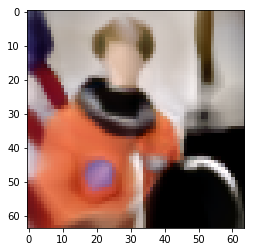

In [14]:
n_iterations = 500
batch_size = 50
with tf.Session() as sess:
    # Here we tell tensorflow that we want to initialize all
    # the variables in the graph so we can use them
    # This will set W and b to their initial random normal value.
    sess.run(tf.global_variables_initializer())

    # We now run a loop over epochs
    prev_training_cost = 0.0
    for it_i in range(n_iterations):
        idxs = np.random.permutation(range(len(xs)))
        n_batches = len(idxs) // batch_size
        for batch_i in range(n_batches):
            idxs_i = idxs[batch_i * batch_size: (batch_i + 1) * batch_size]
            sess.run(optimizer, feed_dict={X: xs[idxs_i], Y: ys[idxs_i]})

        training_cost = sess.run(cost, feed_dict={X: xs, Y: ys})
        print(it_i, training_cost)

        if (it_i + 1) % 20 == 0:
            ys_pred = Y_pred.eval(feed_dict={X: xs}, session=sess)
            fig, ax = plt.subplots(1, 1)
            img = np.clip(ys_pred.reshape(img.shape), 0, 255).astype(np.uint8)
            plt.imshow(img)
            plt.show()